In [ ]:
# Click into this cell and press shift-enter before using this notebook.
# This line loads the ability to use %%ai in your file
%load_ext jupyter_ai_magics
# These lines import the Python modules we commonly use in CMPSC 5A
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

# Lecture 6, CMPSC 5A, S25

04/17/2025, Week 3

### Note to self: check if font size is readable for back row

## Where are we in the reading?

By today, you should have finished reading:
* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5 (Sequences)](https://inferentialthinking.com/chapters/05/Sequences.html) 
* [Chapter 6 (Intro)](https://inferentialthinking.com/chapters/06/Tables.html)
* [Section 6.1 (Sorting Rows)](https://inferentialthinking.com/chapters/06/1/Sorting_Rows.html#)
* [Section 6.2 (Selecting Rows)](https://inferentialthinking.com/chapters/06/2/Selecting_Rows.html)

### Note to self: check if font size is readable for back row

## Where are we in the reading?

By today, you should have finished reading:
* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5 (Sequences)](https://inferentialthinking.com/chapters/05/Sequences.html) 
* [Chapter 6 (Tables)](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7 (Visualization)](https://inferentialthinking.com/chapters/07/Visualization.html)

For this coming Tuesday, please also read:

* [Chapter 8 (Functions and Tables: Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Section 8.1 (Applying a Function to a Column)](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)

Note that we started talking about the material in the Chapter 8 Intro, and Section 8.1 at the end of last lecture, and we'll be talking about it a bit more today.

So if you are behind, it may be good to do *the Chapter 8 intro and Section 8.1 reading first* and then go back and catch up on the rest (Chapters 6 and 7).


# Attendance participation check

Today's attendance participation check is assignment ic09 on Canvas/Gradscope.

* [ic09](https://www.gradescope.com/courses/1014383/assignments/6104776)

I think it might be interesting to put together a data table about the students and staff for  this class.  I think it might be fun to work with data that we know is about us.

However, I want to be sure that it only contains data that would not be considered an invasion of privacy. So in today's activity, were going to survey the class about your views about certain questions, and whether you'd be comfortable sharing your answers with the class.

I do plan to share the results of this survey in class *but with names removed*.

If we can find some questions that are not controversial or private, then we can use those as the basis of a future survey.

Consider each of these questions, and then choose the response that best matches your opinion.  When you choose between: 

* I'd be comfortable answering this
* I'd be uncomfortable answering this

... the context is that the answers will be revealed *without your names* in a data table, but they will all be revealed together. Note that someone that *knows you well* might be able to guess which row belongs to you, but otherwise, your answers would be confidential.

* [3 minute countdown timer](https://www.youtube.com/watch?v=iHdviZkM7S4)
* [5 minute countdown timer](https://www.youtube.com/watch?v=3dJ4wFqQzz4)

### The UCSB Courses Dataset

Last time, at the end of class, we looked at a dataset about UCSB Courses; what we did wasn't in the notebook (we did it on the fly), so let's review that briefly, and then go into a bit more detail.

As you may recall, any time we have a CSV (comma separated value) file in the `data` folder that's in the same folder as our notebook, as in the  example, we can open it with code like t



| Data folder in same folder as notebook | Explanation |
|-|-|
|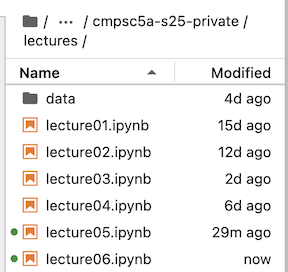 | As you may recall, any time we have a CSV (comma separated value) file in the `data` folder that's in the same folder as our notebook, as in the  example, we can open it with code this: |

In [ ]:
courseTable = Table.read_table("data/ucsb-s25-courses.csv")

In [ ]:
courseTable

One thing we noted about this table is that the `COURSEID` column has string data in it that smushes three things together: 

* Subject Area (e.g. "CMPSC", "MATH", "PSTAT", "ECE", "ARTHI")
* Course Number (e.g. "5B", "120A", etc.)
* Section Suffix (e.g. "-1", "-2")

What we might prefer is a table that has separate columns for each of these.

We can use two techniques in combination to do this:
* Defining "plain old Python functions" (this part isn't specific to Data Science; it's just Python programming like you would learn in any good Python course)
* Using the `apply` method of the `datascience` library; this allows us to create a new `numpy.ndarray` from a column, which we can then attach to a table using `with_columns`.

Let's review that now (a little more slowly than what we did at the end of last lecture)

### A digression: randomly sampling a table

The table we are looking at is *big*:

In [ ]:
courseTable.num_rows

That's a lot of rows; and it appears to be sorted in such a way that the first few rows are all Computer Science courses. 

If we sort it by `COURSEID`, we get `ANTH` courses at the top:

In [ ]:
courseTable.sort("COURSEID")

### What if we want a random sample?

How big is this table again?

In [ ]:
courseTable.num_rows

That's big.  If we are trying to get an overall view of the data, we might want to look at, say, 10 randomly chosen rows from this table.  

How can we do that? 

First, we can use a `numpy` function to generate random row indexes between 0 and n-1.   Let's assign `n=courseTable.num_rows`

In [ ]:
n=courseTable.num_rows

Then let's generate an array of all of the numbers from 0 to n-1, using the `np.arange()` function:

In [ ]:
allRowIndexes = np.arange(n)

In [ ]:
allRowIndexes

Now we can use `np.random.choice()` to select 10 random indexes from that array of numbers.

* The first argument, allRowIndexes, is the array we choose from
* The second is how many things we choose
* The `replace=False` says: once you choose an element of this array, don't' choose it again (i.e. don't put it back in the array you are choosing randomly from, don't "replace" it).

In [ ]:
randomIndexes = np.random.choice(allRowIndexes, 10, replace=False)

In [ ]:
randomIndexes

Note that if we run the cell with `np.random.choice` in it multiple time, we get different answers each time!  

(Side note: there's a way to force the same answer each time if we *want or need* that, called "seeding" the random number generator.  We'll discuss that another time.)

Now that we have randomIndexes, we can use this with the `take` method of the  `Table` from `datascience` like this:

In [ ]:
tenRandomRows = courseTable.take(randomIndexes)

In [ ]:
tenRandomRows

I split this up so that we could look at each of the parts separately. Here it is all together.  This time, we'll just take 4 rows (to keep the notebook more compact)

In [ ]:
# Try re-running this; you'll get different rows each time
n = courseTable.num_rows # get number of rows
allRowIndexes = np.arange(n) # get all of the row indexes, 0 .. n-1
fourRandomIndexes = np.random.choice(allRowIndexes, 4, replace=False)
fourRandomRows = courseTable.take(fourRandomIndexes)
fourRandomRows

We could also do this on a single line, though it's a bit harder to read and understand:

In [ ]:
courseTable.take(np.random.choice(np.arange(courseTable.num_rows), 4, replace=False))

It's a little bit easier to read if we break it up over multiple lines.
* Note that here we don't need line continuations (the backslash `\` at the end of the line).
* Python allows us to continue on a new line if we are inside a set of unclosed parentheses.
* The way that I've formatted this is typical of how experienced programmers format a complex set of nested function calls
* The indentation is used to help you match open and closing parentheses `(` and `)`

In [ ]:
courseTable.take( 
    np.random.choice( 
        np.arange(courseTable.num_rows), 
        4, 
        replace=False 
    ) 
)   

But that's still a lot, and this seems like a generally useful thing to do.  I wonder if we can come up with a shortcut.

### Defining our own functions

Any time there's something we might want to do over and over again that we can spell out in clear steps, that's a good time to think of writing our own function.

Here's the code again, split into multiple lines with comments:

In [ ]:
# Try re-running this; you'll get different rows each time
n = courseTable.num_rows # get number of rows
allRowIndexes = np.arange(n) # get all of the row indexes, 0 .. n-1
fourRandomIndexes = np.random.choice(allRowIndexes, 4, replace=False)
fourRandomRows = courseTable.take(fourRandomIndexes)
fourRandomRows

To convert this into a function definition, we can first "generalize" the names.  This means making them a bit more "generic".  Compare the code on the left with the code on the right:
* We've pulled out the number `4` and defined it as a variable
* We've changed the name of the table from `courseTable` to `myTable`

<table>
    <thead>
        <tr>
            <th>Before</th>
            <th>After</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <pre>
                    
n = courseTable.num_rows 
allRowIndexes = np.arange(n) 
fourRandomIndexes = \
  np.random.choice(
    allRowIndexes, 4, replace=False
  )
fourRandomRows = courseTable.take(fourRandomIndexes)
fourRandomRows
                </pre>
            </td>
            <td>
                <pre>
size = 4
n = myTable.num_rows 
allRowIndexes = np.arange(n) 
randomIndexes = \
  np.random.choice(
    allRowIndexes, size, replace=False
  )
randomRows = myTable.take(randomIndexes)
randomRows
                </pre>
            </td>
        </tr>
    </tbody>
</table>

Now, we are ready to turn this into a function definition:
* The things that can change each time (the table, the sample size) become *arguments*
* We put the keyword `return` in front of the final results we want to get back

In [ ]:
def randomSample(myTable, size):
    n = myTable.num_rows 
    allRowIndexes = np.arange(n) 
    randomIndexes = \
      np.random.choice(
        allRowIndexes, size, replace=False
      )
    randomRows = myTable.take(randomIndexes)
    return randomRows

Now we can call this function on any table we like.  Here's another table that's in our data directory:

In [ ]:
movies = Table.read_table("data/movies_by_year_with_ticket_price.csv")

In [ ]:
randomSample(movies,2)

In [ ]:
randomSample(courseTable,3)

In [ ]:
randomSample(courseTable,5)

## Now, let's look at this `COURSEID` field again

Now that we have a convenient way to get a random sample of a table, let's look some more at the COURSEID values.

* We'll pull out a random sample of the table
* Then, we'll focus on the data from the first column
* Then, we'll look at the specific values

Recall the difference between `select` and `column`:



In [ ]:
fourRows = randomSample(courseTable,4)
fourRows.select("COURSEID")

In [ ]:
fourRows.column("COURSEID")

The difference:
* `.select` gives us a Table (specifically, a `datascience.tables.Table`)
* `.column` gives us an Array (specifically, a `numpy.ndarray`)

In [ ]:
type(fourRows.select("COURSEID"))

In [ ]:
fourRows.column("COURSEID")

These values have a particular format, i.e. they are spaced in a particular way, but it might be hard to see from the output above.  When we show a `Table`, the spacing inside of `'COMM    160OD-1'` isn't preserved; the multiple spaces become one space.  

On the other hand, it's hard to see in the output from `fourRows.column("COURSEID")` how things line up.

This is where a python `for` loop together with a print statement may be of some help.

## For loops with arrays

Whenever you have an array, we can do something repeatedly to each item in that array with a `for` loop in Python. 

This is our first look at `for` loops:
* We'll dive into them in detail when we get to Section 9.2 of the book
* This is just a quick preview, but if you want to know more you can look ahead at [Section 9.2 (Iteration)](https://inferentialthinking.com/chapters/09/2/Iteration.html)

First, let's assign the array of COURSEID values to a variable name:


In [ ]:
courseIds = fourRows.column("COURSEID")
courseIds

Now we apply a for loop:

In [ ]:
for courseId in courseIds:
    print(courseId)

Note that we get one courseId on each line.  It's still a little hard to see the spacing though.  Suppose we replace all of the spaces with an `@` sign; it might be easier to count:

In [ ]:
for courseId in courseIds:
    print(courseId.replace(" ","@"))

Ok! Now we are getting somewhere.  Lets also print some numbers on top so that we can see where the columns line up:


In [ ]:
print("          11111111112")
print("012345678901234567890")
for courseId in courseIds:
    print(courseId.replace(" ","@"))

Those first two lines may look a little strange, but what you can see from them is where the columns are in the string data:
* So the subject area is in columns zero through seven, or in Python notation: `[0:8]` (we stop *before* the second number).
* The three-digit course number starts in column `8` and is columns 8,9,10 (or in Python slice syntax, columns `[8:11]`.
* That is followed by an option two character code, so the full course number is `[8:13]`
* The suffix for the section starts in position 14 and goes to the end: `[14:]`

### Functions to break apart `COURSEID`

With that, we can write some functions that will turn a COURSEID into its three parts:

In [ ]:
def courseIdToDept(courseId):
    return courseId[0:8]

def courseIdToCourseNum(courseId):
    return courseId[8:13]

def courseIdToSuffix(courseId):
    return courseId[14:]

We can test these with our for loop.  

Note that code that is "inside the loop" is indented:

In [ ]:
print("Departments:")
for courseId in courseIds:
   print(courseIdToDept(courseId))

print("CourseNums:")
for courseId in courseIds:
   print(courseIdToCourseNum(courseId))

print("Suffixes:")
for courseId in courseIds:
   print(courseIdToSuffix(courseId))


We can run that again, but on a random sample, and rerun it a few times to see if it seems to be working:

In [ ]:
courseIds = randomSample(courseTable,5).column("COURSEID")

print("Departments:")
for courseId in courseIds:
   print(courseIdToDept(courseId))

print("CourseNums:")
for courseId in courseIds:
   print(courseIdToCourseNum(courseId))

print("Suffixes:")
for courseId in courseIds:
   print(courseIdToSuffix(courseId))


Here's another way to format the output that make it a bit easier to see what's going on.  This uses a "format string" in Python.  
* We put the letter `f` before the opening `"` in the string
* Then we can put variables names in `{}` and they will be substituted in
* Also notice that we can put multiple lines of code inside our loop:

In [ ]:
courseIds = randomSample(courseTable,5).column("COURSEID")

for courseId in courseIds:
   dept = courseIdToDept(courseId)
   courseNum = courseIdToCourseNum(courseId)
   suffix = courseIdToSuffix(courseId)
   print(f"courseId={courseId} dept={dept} courseNum={courseNum} suffix={suffix}")


## Using functions to make a new table: `apply`

Note: material in this section of the lecture comes from

* [Chapter 8 (Functions and Tables: Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Section 8.1 (Applying a Function to a Column)](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)


Now that we know how to use functions to transform data, 
we can use this to:
* make new arrays using the `apply` method.
* add those to a table as columns

Here's what that looks like:

We start with our courseTable:

In [ ]:
courseTable

Remember the three functions from before for converting `COURSEID` values:

In [ ]:
def courseIdToDept(courseId):
    return courseId[0:8]

def courseIdToCourseNum(courseId):
    return courseId[8:13]

def courseIdToSuffix(courseId):
    return courseId[14:]

We can make three new arrays by applying these functions to column 0 of our `courseTable`.  Each result we get back is an array.  The `0` indicates we are applying our functions to column 0.

In [ ]:
departments = courseTable.apply(courseIdToDept, 0)
departments

In [ ]:
courseNums = courseTable.apply(courseIdToCourseNum, 0)
courseNums

In [ ]:
suffixes = courseTable.apply(courseIdToSuffix, 0)
suffixes

Now, we can create a new table by adding these columns to our existing table:

In [ ]:
newTable = courseTable.with_columns("dept",departments,"courseNum",courseNums,"suffix",suffixes)

In [ ]:
newTable

And with this new tables, we can use the `where` clause to focus our attention on particular departments:

In [ ]:
csCourses = newTable.where("dept",are.equal_to("CMPSC"))

In [ ]:
csCourses

Wait, that's not what we expected?   What's the issue?

It's the spaces.  Consider this:

In [ ]:
newTable.where("dept",are.equal_to("CMPSC   "))

Well that's inconvenient.  What could we do to fix this?

Here's one approach; a modification to our functions that pulls out the department code, etc.  We'll use the python `strip` function to get rid of the extra space characters:

In [ ]:
def courseIdToDept(courseId):
    return courseId[0:8].strip()

def courseIdToCourseNum(courseId):
    return courseId[8:13].strip()

def courseIdToSuffix(courseId):
    return courseId[14:].strip()

With these new definitions in place, let's redo the assignment to the newTable:

In [ ]:
newImprovedTable = courseTable.with_columns(
    "dept", courseTable.apply(courseIdToDept, 0),
    "courseNum", courseTable.apply(courseIdToCourseNum, 0),
    "suffix", courseTable.apply(courseIdToSuffix, 0)
)


And then let's select out the CMPSC courses, this time without having to pad out the department:

In [ ]:
csCourses = newImprovedTable.where("dept",are.equal_to("CMPSC"))

In [ ]:
csCourses

In [ ]:
pstatCourses = newImprovedTable.where("dept",are.equal_to("PSTAT"))
artHistory = newImprovedTable.where("dept",are.equal_to("ARTHI"))

In [ ]:
artHistory

## Bar Graphs

Let's now return to some material from:

* [Chapter 7 (Visualization)](https://inferentialthinking.com/chapters/07/Visualization.html)

Let's see if we can make a bar graph of the data from `courseTable`.

But let's work with the `newImprovedTable` that has `dept`, `courseNum`, `suffix`.  And let's cut the data down to just three departments: `CMPSC`, `MATH`, `PSTAT`, just to make it a bit easier to work with.

It will be really handy to refer to this documentation:
* <https://www.data8.org/datascience/reference-nb/datascience-reference.html#Table.where-Predicates>

In this context, a `predicate` is something that's true or false about rows of our data.  The one we will use here is `are.contained_in` which works with an array.

In [ ]:
desired_departments = make_array("CMPSC", "PSTAT", "MATH")

In [ ]:
courses = newImprovedTable.where("dept", are.contained_in(desired_departments))

In [ ]:
courses.num_rows

Still pretty big, but a lot smaller than what we had before.

The first step is to group our data.

## Grouping Data

In [ ]:
groupByDept = courses.group("dept")

In [ ]:
groupByDept

What we get back is a new table that shows the count of how many rows were in the original data set with each of the distinct values in the original.

Note that the original data has separate rows for lecture and sections.  What if we exclude the sections?  Lectures have section numbers that end in 00; that is the remainder when you divide by 100 is 0.  We can use this to define a function that will tell us whether a section number is for a lecture or not.

In [ ]:
def isLecture(sectionNum):
    # if section number is divisible by 100, it's a lecture
    return sectionNum % 100 == 0

In [ ]:
isLecture(100)

In [ ]:
isLecture(101)

Now we can apply that and add the column to our table:

In [ ]:
courses = courses.with_columns("lecture",courses.apply(isLecture,"SECTION"))

In [ ]:
courses

In [ ]:
lectures = courses.where("lecture",are.equal_to(True))

In [ ]:
lectures.num_rows

In [ ]:
lectures.group("dept")

That's probably a bit more like what we want.  What if we wanted to know the total enrollment?  Can we sum up the `ENROLLED` field for each group?  Yes we can!

In [ ]:
lectures.group("dept", sum)

What we get back is the 'sum' function applied to each column of data.
* The numbers in `ENROLLED sum` show the total of the enrollment
* The numbers in `MAXRENROLL sum` show the total of the max enrollment, i.e. how big the class could be if full
* The numbers if `QUARTER sum` and `SECTION sum` are not really meaningful; they are adding up numbers that are really just identifiers.  We might have done well to exclude those columns before doing our grouping.
* Lecture sum shows us the number of rows for which that field is True.  Since that's every row of data, this actually shows us the same as the counts from the original `.group()` call.

We can now make some bar graphs with this data.

Here's a bar graph of the number of courses offered by each department:


In [ ]:
counts = lectures.group("dept")
counts

In [ ]:
counts.barh("dept") # Bar graph of count, by department

Or we can make a bar graph by enrollment:

In [ ]:
lectures.select("dept","ENROLLED").group("dept",sum)

In [ ]:
lectures.select("dept","ENROLLED").group("dept",sum).barh("dept")

In [ ]:
If we want, we can sort first:

In [ ]:
lectures.select("dept","ENROLLED").group("dept",sum).sort("ENROLLED sum").barh("dept")

## If there's extra time

#### New Fields
* How could we add a variable level that is `L` for lower division, `U` for upper division and `G` for grad classes?
* With that variable in place, how could we redo our bar chart, showing only lower division, upper divison, or grad courses?
* How could we exclude from our data "special" individual classes such as `CMPSC 196`, `CMPSC 199`, `PSTAT 199`, etc. that are not "typical" classroom courses (and might throw off the enrollment numbers).

#### Averaging?
* How could we compute the average occupancy for each of the departments?
* How could we add a new field to the table of courses showing the occupancy as a percentage, i.e. `(ENROLLED / MAXENROLL) * 100)`
